In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, '..', 'data', 'bitcoin_data.csv')
MODEL_PATH = os.path.join(BASE_DIR, '..', 'models', 'bitcoin_lstm.h5')
SCALER_PATH = os.path.join(BASE_DIR, '..', 'models', 'scaler.gz')

### Modelo bitcoin univariable

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
precio de cierre de hoy 90,053.23 USD
prediccion del valor del bitocoin los siguientes dias
prediccion mañana: 90318.47 USD
prediccion Pasado: 90104.91 USD


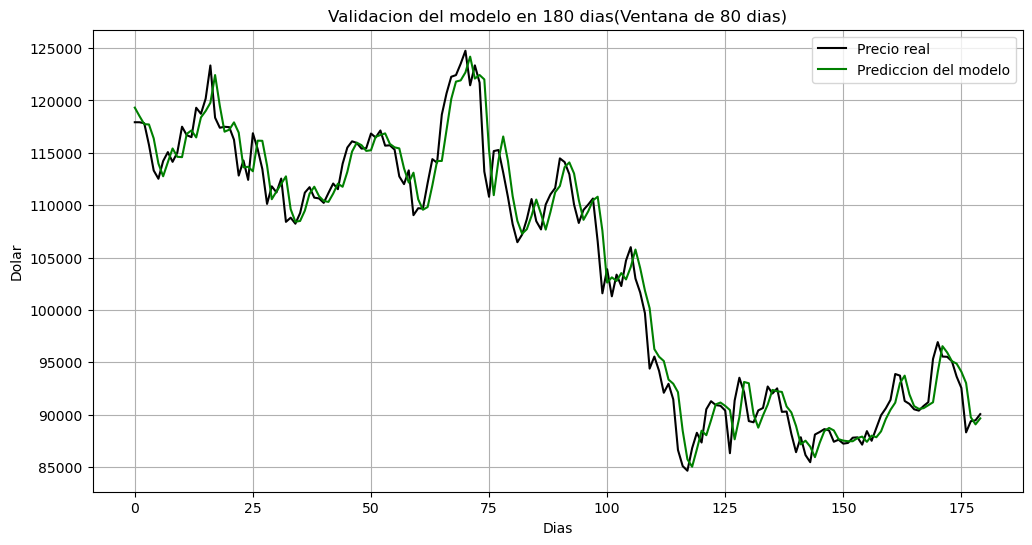

In [17]:
def fp():

    model = load_model(MODEL_PATH)
    scaler =joblib.load(SCALER_PATH)

    df = pd.read_csv(DATA_PATH, index_col=0, parse_dates=True)
    data = df.values
    scaled_data = scaler.transform(data)

    PD = 80 # debe ser igual al de train
    x_test = []
    y_test = []

    start_index = len(scaled_data) - 180 #dias

    for i in range(start_index, len(scaled_data)):
        x_test.append(scaled_data[i-PD:i, 0])
        y_test.append(scaled_data[i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    #prediccion sobre datos conocidos
    predicted_prices = model.predict(x_test)
    # quedarse solo con la columna 0  para que el scaler no falle 
    predicted_prices = predicted_prices[:, 0].reshape(-1, 1)
    #invertir escala
    predicted_prices = scaler.inverse_transform(predicted_prices)
    real_prices = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    #prediccion a futuro 
    l_d = scaled_data[-PD:]
    l_d = l_d.reshape(1, PD, 1)

    tomorrow_prediction = model.predict(l_d)
    tomorrow_prediction = tomorrow_prediction.reshape(-1, 1) # girar los datos para poder des-escalar los dias juntos
    tomorrow_price = scaler.inverse_transform(tomorrow_prediction)

    #obtener el precio del ultimo dia real
    last_real_scaled = scaled_data[-1]
    last_real_price = scaler.inverse_transform(last_real_scaled.reshape(-1, 1))
    print(f"precio de cierre de hoy {last_real_price[0][0]:,.2f} USD")

    print("prediccion del valor del bitocoin los siguientes dias")
    print(f"prediccion mañana: {tomorrow_price[0][0]:.2f} USD")
    print(f"prediccion Pasado: {tomorrow_price[1][0]:.2f} USD")

    plt.figure(figsize=(12, 6))
    plt.plot(real_prices, color='black', label='Precio real')
    plt.plot(predicted_prices, color='green', label='Prediccion del modelo')
    plt.title(f'Validacion del modelo en 180 dias(Ventana de {PD} dias)')
    plt.xlabel('Dias')
    plt.ylabel('Dolar')
    plt.legend()
    plt.grid(True)
    plt.show()

fp()

El modelo de Bitcoin muestra un buen desempeño ya que logra recrear correctamente los picos y caidas historicas y la prediccion del valor generada es muy similar al valor real.


Esto probablemente ocurre porque el Bitcoin debe ser menos sensible a factores economicos externos en comparacion con el Peso Chileno lo que hace que su valor y comportamiento sea mas facil de predecir por lo que no veo necesario utilizar un modelo multivariable para el bitcoin, con este me basta como experimento

### Modelo CLP univariado

In [18]:
DATA_PATH2 = os.path.join(BASE_DIR, '..', 'data', 'clp_data.csv')
MODEL_PATH2 = os.path.join(BASE_DIR, '..', 'models', 'clp_lstm.h5')
SCALER_PATH2 = os.path.join(BASE_DIR, '..', 'models', 'scaler_clp.gz')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
precio de cierre de hoy 865.91 CLP
prediccion del valor del dolar a peso chileno
prediccion mañana: 881.06 CLP
prediccion Pasado: 881.71 CLP


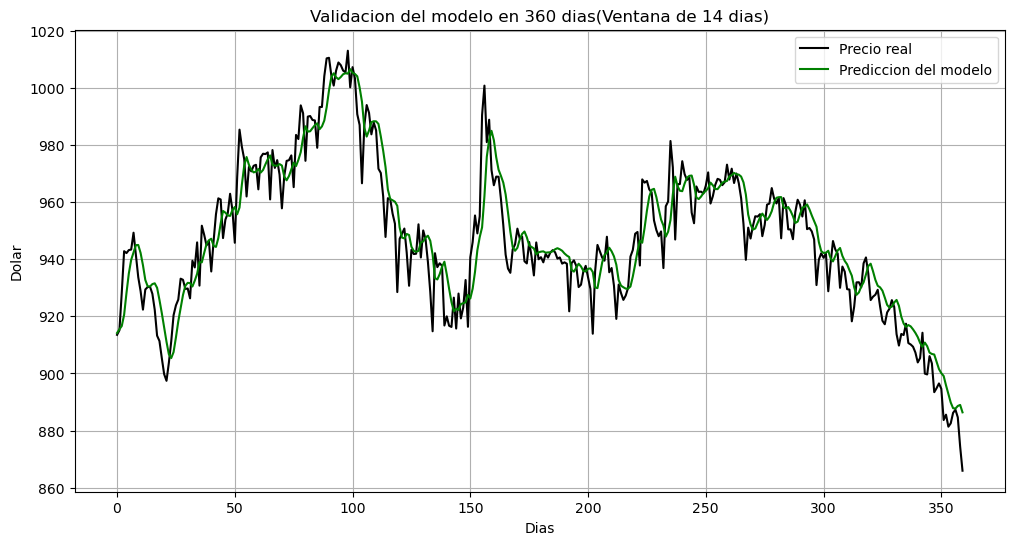

In [19]:
def fp():

    model = load_model(MODEL_PATH2)
    scaler =joblib.load(SCALER_PATH2)

    df = pd.read_csv(DATA_PATH2, index_col=0, parse_dates=True)
    data = df.values
    scaled_data = scaler.transform(data)

    PD = 14 # debe ser igual al de train
    x_test = []
    y_test = []

    start_index = len(scaled_data) - 360 #dias

    for i in range(start_index, len(scaled_data)):
        x_test.append(scaled_data[i-PD:i, 0])
        y_test.append(scaled_data[i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    #prediccion sobre datos conocidos
    predicted_prices = model.predict(x_test)
    #solo columna 0
    predicted_prices = predicted_prices[:, 0].reshape(-1, 1)
    #invertir escala
    predicted_prices = scaler.inverse_transform(predicted_prices)
    real_prices = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    #prediccion a futuro 
    l_d = scaled_data[-PD:]
    l_d = l_d.reshape(1, PD, 1)

    tomorrow_prediction = model.predict(l_d)
    tomorrow_prediction = tomorrow_prediction.reshape(-1, 1) # girar los datos para poder desescalar los dias juntos
    tomorrow_price = scaler.inverse_transform(tomorrow_prediction)

    #obtener el precio del ultimo dia real
    last_real_scaled = scaled_data[-1]
    last_real_price = scaler.inverse_transform(last_real_scaled.reshape(-1, 1))
    print(f"precio de cierre de hoy {last_real_price[0][0]:,.2f} CLP")

    print("prediccion del valor del dolar a peso chileno")
    print(f"prediccion mañana: {tomorrow_price[0][0]:.2f} CLP")
    print(f"prediccion Pasado: {tomorrow_price[1][0]:.2f} CLP")

    plt.figure(figsize=(12, 6))
    plt.plot(real_prices, color='black', label='Precio real')
    plt.plot(predicted_prices, color='green', label='Prediccion del modelo')
    plt.title(f'Validacion del modelo en 360 dias(Ventana de {PD} dias)')
    plt.xlabel('Dias')
    plt.ylabel('Dolar')
    plt.legend()
    plt.grid(True)
    plt.show()

fp()

En este modelo existe una diferencia importante pues el modelo predice que el dolar va a subir pero en realidad sigue bajando debido a factores externos,este error puede ser por utilizar solo una variable para la prediccion ya que a diferencia del Bitcoin el peso Chileno es mucho mas sensible a cambios externos como el precio del cobre o la politica de los paises por lo que al no incluir mas variables el modelo no logra predecir correctamente la tendencia real

### Modelo CLP multivariable

In [20]:
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, '..', 'data', 'clp_multivariable.csv')
MODEL_PATH = os.path.join(BASE_DIR, '..', 'models', 'clp_multi_lstm.h5')
SCALER_X_PATH = os.path.join(BASE_DIR, '..', 'models', 'scaler_multi_X.gz')
SCALER_Y_PATH = os.path.join(BASE_DIR, '..', 'models', 'scaler_multi_Y.gz')


Datos de validacion:

X_test shape: (354, 70, 3)
y_test shape: (354, 7)

metricas de validacion

Dia +1: MAE=7.39 CLP | RMSE=9.73 CLP | MAPE=0.78%
Dia +2: MAE=8.71 CLP | RMSE=11.34 CLP | MAPE=0.91%
Dia +3: MAE=9.42 CLP | RMSE=12.23 CLP | MAPE=0.99%
Dia +4: MAE=10.41 CLP | RMSE=13.34 CLP | MAPE=1.10%
Dia +5: MAE=11.18 CLP | RMSE=14.36 CLP | MAPE=1.18%
Dia +6: MAE=12.31 CLP | RMSE=15.78 CLP | MAPE=1.30%
Dia +7: MAE=12.96 CLP | RMSE=16.66 CLP | MAPE=1.36%

Promedio: MAE=10.34 CLP | RMSE=13.54 CLP | MAPE=1.09%

Ultimo precio conocido (2026-01-23): 865.13 CLP

Prediccion para los proximos 7 dias:

Día +1 (2026-01-24): 875.46 CLP (+10.33 / +1.19%)
Día +2 (2026-01-25): 874.35 CLP (+9.22 / +1.07%)
Día +3 (2026-01-26): 876.76 CLP (+11.63 / +1.34%)
Día +4 (2026-01-27): 876.87 CLP (+11.74 / +1.36%)
Día +5 (2026-01-28): 877.00 CLP (+11.87 / +1.37%)
Día +6 (2026-01-29): 876.82 CLP (+11.69 / +1.35%)
Día +7 (2026-01-30): 874.96 CLP (+9.83 / +1.14%)


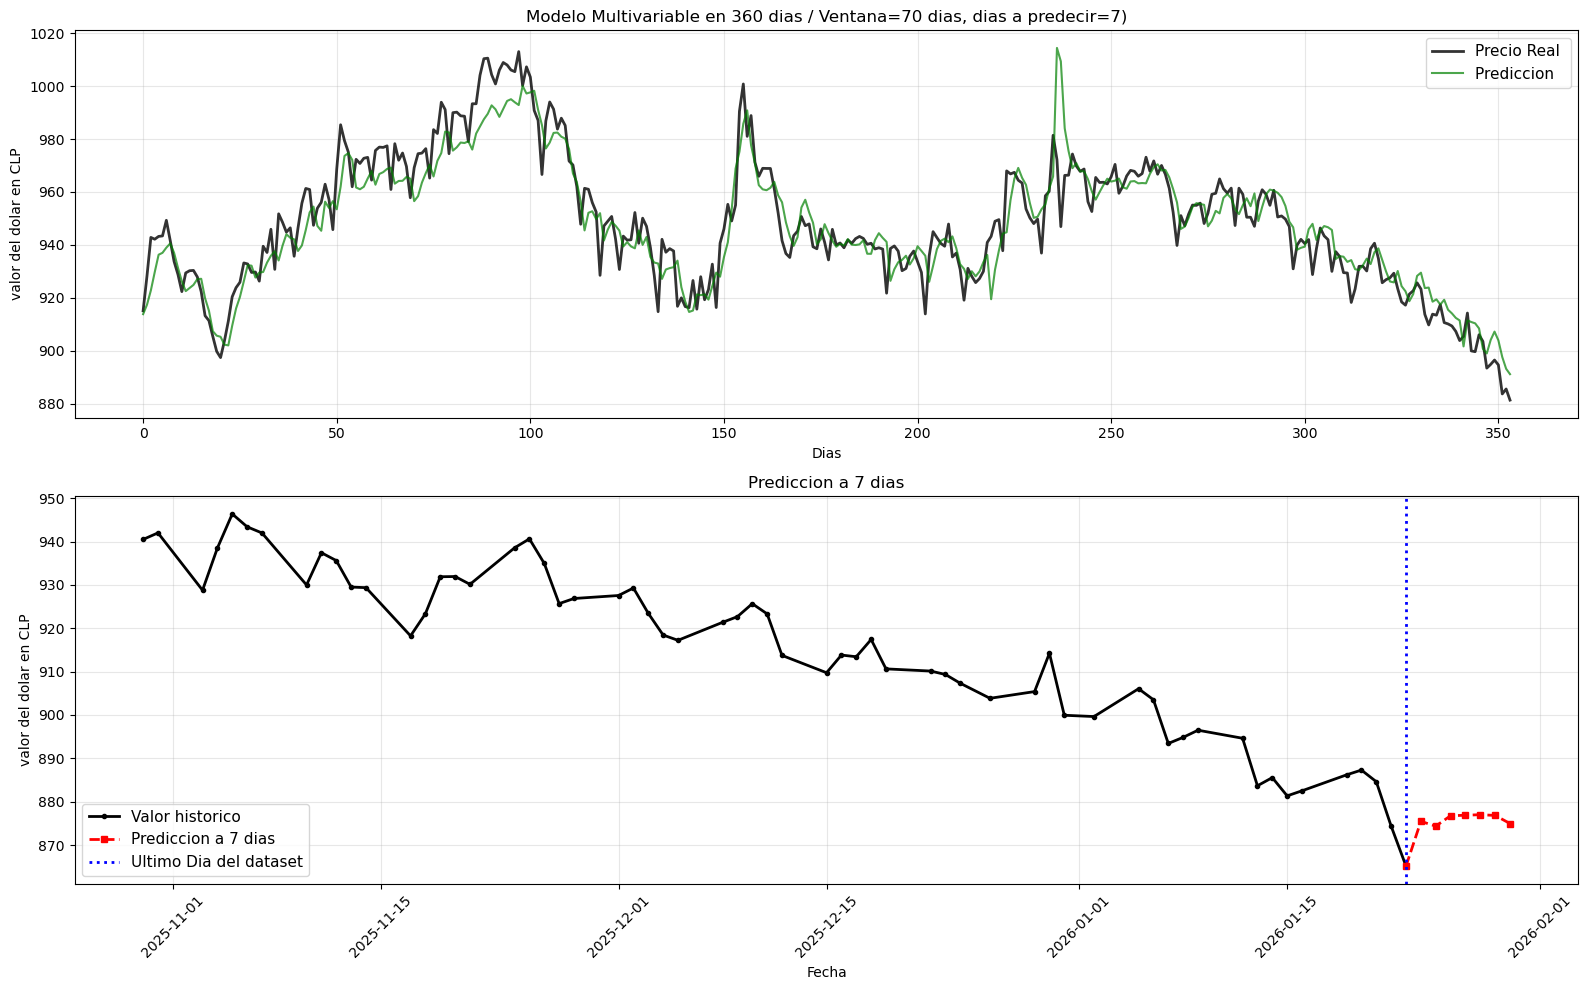

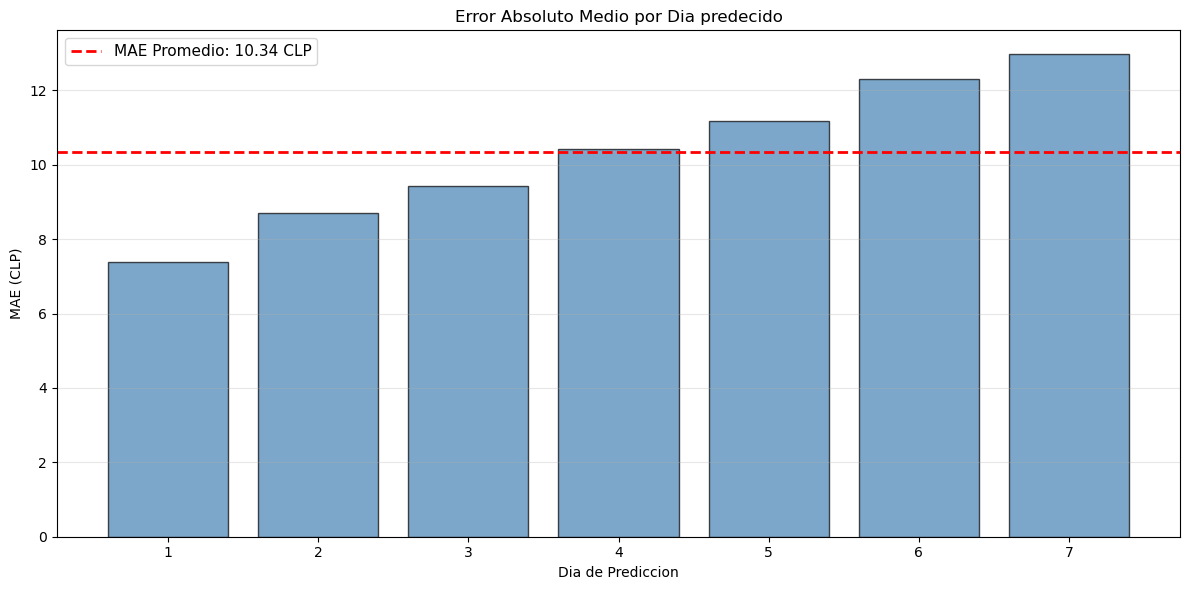

In [21]:
def predict_clp_multi():
    
    model = load_model(MODEL_PATH)
    scaler_x = joblib.load(SCALER_X_PATH)  # Scaler de los features clp,dolar index y cobre
    scaler_y = joblib.load(SCALER_Y_PATH)  # Scaler del target CLP
    
    # Cargar datos
    df = pd.read_csv(DATA_PATH, index_col=0, parse_dates=True)
    features = ['CLP', 'Dolar_Index', 'Cobre']
    data = df[features].values  
    
    # Escalar los features
    scaled_data = scaler_x.transform(data)  
    
    #ventana y dias a predecir, pd debe conincidir
    PD = 70   
    PDC = 7   
    
    x_test = []
    y_test = []
    
    start_index = len(scaled_data) - 360  
    
    for i in range(start_index, len(scaled_data) - PDC + 1):
        x_test.append(scaled_data[i-PD:i, :])  # Shape: (PD, 3)
        y_test.append(scaled_data[i:i+PDC, 0])  # Shape: (PDC,)
    
    x_test = np.array(x_test)  # (samples, PD, 3)
    y_test = np.array(y_test)  # (samples, PDC)
    
    print(f"\nDatos de validacion:\n")
    print(f"X_test shape: {x_test.shape}")
    print(f"y_test shape: {y_test.shape}")

    # Prediccion sobre datos conocidos
    predicted_prices_scaled = model.predict(x_test, verbose=0)  
    
    # Desnormalizar predicciones usando el scaler de y
    predicted_prices = scaler_y.inverse_transform(predicted_prices_scaled)
    real_prices = scaler_y.inverse_transform(y_test)
    
    # Calcular metricas por dia
    print(f"\nmetricas de validacion\n")
    
    for day in range(PDC):
        mae_day = mean_absolute_error(real_prices[:, day], predicted_prices[:, day])
        rmse_day = np.sqrt(mean_squared_error(real_prices[:, day], predicted_prices[:, day]))
        mape_day = np.mean(np.abs((real_prices[:, day] - predicted_prices[:, day]) / real_prices[:, day])) * 100
        print(f"Dia +{day+1}: MAE={mae_day:.2f} CLP | RMSE={rmse_day:.2f} CLP | MAPE={mape_day:.2f}%")
    
    # Promedio de todos los dias
    mae_total = mean_absolute_error(real_prices, predicted_prices)
    rmse_total = np.sqrt(mean_squared_error(real_prices, predicted_prices))
    mape_total = np.mean(np.abs((real_prices - predicted_prices) / real_prices)) * 100
    print(f"\nPromedio: MAE={mae_total:.2f} CLP | RMSE={rmse_total:.2f} CLP | MAPE={mape_total:.2f}%\n")
    
    # PREDICCION FUTURA Proximos 7 dias
    # Tomar los ultimos PD dias para predecir el futuro
    last_window = scaled_data[-PD:]  
    last_window = last_window.reshape(1, PD, 3)  
    
    # Predecir proximos PDC dias
    future_prediction_scaled = model.predict(last_window, verbose=0)  
    future_prediction = scaler_y.inverse_transform(future_prediction_scaled)  
    
    # Obtener el ultimo precio real
    last_real_price = df['CLP'].iloc[-1]
    last_date = df.index[-1]
    
    print(f"Ultimo precio conocido ({last_date.strftime('%Y-%m-%d')}): {last_real_price:,.2f} CLP\n")
    print(f"Prediccion para los proximos {PDC} dias:\n")
    
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=PDC, freq='D')
    
    for i, (date, price) in enumerate(zip(future_dates, future_prediction[0])):
        change = price - last_real_price
        change_pct = (change / last_real_price) * 100
        print(f"Día +{i+1} ({date.strftime('%Y-%m-%d')}): {price:,.2f} CLP ({change:+.2f} / {change_pct:+.2f}%)")
    
    
    # Grafico de validacion en 360 dias
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Solo prediccion del día 1 para mas claridad
    axes[0].plot(real_prices[:, 0], color='black', linewidth=2, label='Precio Real ', alpha=0.8)
    axes[0].plot(predicted_prices[:, 0], color='green', linewidth=1.5, label='Prediccion ', alpha=0.7)
    axes[0].set_title(f'Modelo Multivariable en 360 dias / Ventana={PD} dias, dias a predecir={PDC})')
    axes[0].set_xlabel('Dias')
    axes[0].set_ylabel('valor del dolar en CLP')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Grafico ultimos 60 dias + prediccion futura
    recent_days = 60
    recent_real = df['CLP'].iloc[-recent_days:].values
    recent_dates = df.index[-recent_days:]
    
    axes[1].plot(recent_dates, recent_real, color='black', linewidth=2, label='Valor historico', marker='o', markersize=3)
    
    # Agregar prediccion futura
    future_plot_dates = pd.date_range(start=last_date, periods=PDC+1, freq='D')
    future_plot_prices = np.concatenate([[last_real_price], future_prediction[0]])
    
    axes[1].plot(future_plot_dates, future_plot_prices, color='red', linewidth=2, label='Prediccion a 7 dias', marker='s', markersize=5, linestyle='--')
    axes[1].axvline(x=last_date, color='blue', linestyle=':', linewidth=2, label='Ultimo Dia del dataset')
    axes[1].set_title(f'Prediccion a {PDC} dias')
    axes[1].set_xlabel('Fecha')
    axes[1].set_ylabel('valor del dolar en CLP')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Comparacion de errores por dia
    plt.figure(figsize=(12, 6))
    mae_per_day = [mean_absolute_error(real_prices[:, i], predicted_prices[:, i]) for i in range(PDC)]
    
    plt.bar(range(1, PDC+1), mae_per_day, color='steelblue', alpha=0.7, edgecolor='black')
    plt.axhline(y=mae_total, color='red', linestyle='--', linewidth=2, label=f'MAE Promedio: {mae_total:.2f} CLP')
    plt.title('Error Absoluto Medio por Dia predecido')
    plt.xlabel('Dia de Prediccion')
    plt.ylabel('MAE (CLP)')
    plt.xticks(range(1, PDC+1))
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
if __name__ == "__main__":
    predict_clp_multi()

Para la configuracion del modelo se realizaron las predicciones a 7 dias utilizando ahora si un LSTM multivariable con tres entradas que son peso chileno, dollar index y cobre (se descarto el yuan ya que se obtuvo mejores resultados sin el)


Para lograr buenos resultados fue necesario modificar el modelo univariable original agregando una seed para la reproducibilidad, se elimino la capa intermedia oculta y se ajusto el dropout a 20% y 15% en la primera capa y la de salida respectivamente,la configuracion de neuronas quedo en 45 para la primera capa y 20 para la segunda manteniendo relu en la de salida,ademas se aumentaron las epocas a 250 y el tamaño del batch a 64 para asegurar una mejor convergencia y estabilidad en el gradiente ya que el modelo es mas complejo que el univariado, tambien se agrego una separacion manual de los datos en 80% train 10% val y 10% test quitando asi la separacion por validation_split


En el entrenamiento se incorporaron nuevas metricas para un mejor analisis como el MAE para interpretar el error de forma directa, el RMSE para penalizar errores grandes y el MAPE para medir el error en porcentaje y se implemento un baseline simple que funsiona asumiendo que el valor de mañana sera igual al de hoy para tener una referencia comparativa del desempeño, 

#### Resultados

A pesar de las mejoras el modelo multivariable insiste en predecir una subida en el dolar aunque de forma mas moderada que el modelo anterior (875 frente a 881),este sesgo parece que es por una fuerte tendencia historica presente en los datos de entrenamiento


El principal problema que me encontre fue ajustar una buena configuracion de hiperparametros ya que fue un proceso mas complejo que en el modelo univariable, requiriendo numerosas pruebas intentando aplicar Batch Normalization, ajustes de learning rate y regularizacion L2, sin que la mayoria lograra mejorar el resultado final, siendo lo que mejor me resulto quitar la capa intermedia como mencione anteriormente, bajar la cantidad de neuronas y el porcentaje de dropout y el aumento de las epocas y batch


En los resultados ademas de la mejor prediccion del valor del CLP se observa que la calidad de la prediccion decae con el tiempo pues el primer dia es aceptable pero los siguientes dias parece estancarse comportandose como un baseline, esto se ve tanto por la prediccion de los dias despues del dia +1 y como el error medio absoluto va subiendo a medida de los dias por lo que lo mejor es quedarse solo con la prediccion del dia +1, la metrica mape permite verlo mejor de forma porcentual, siendo un error de 0.78% el dia +1 y MAPE=1.36% el dia +7, mostrando que el error casi se duplico


Sumado a esto el analisis del primer grafico del precio historico revela ciertos movimientos que no coinciden con la realidad pues hay una bajada y una subida que no existen, lo que sugiere que podria ser mejor volver a reducir los dias de prediccion para evitar este error acumulativo

Para ver bien el entrenamiento del modelo y sus metricas asi como la comparacion con el baseline simple hay que ejecutar el train_multi.py usando python src/train_multi.py y tener el entorno activado, el grafico del entrenamiento del modelo esta dentro de la carpeta models, es el unico png que hay